In [1]:
%run '0.0_init_configuration.ipynb'

/home/antonio/.conda/envs/portfolio/lib/python3.10/site-packages/palmerpenguins/penguins.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


### Descarga de datos

In [2]:
pre_df = pd.read_csv('../../../data/interim//0.1_penguins.csv')
pre_df.head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007


## Colecta y validación de datos

### ¿Qué tipo de dato son las variables del conjunto de datos?


In [3]:
pre_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [94]:
pre_df.dtypes.value_counts()

float64    4
object     3
int64      1
Name: count, dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?


In [95]:
pre_df.shape

(344, 8)

### ¿Existen valores nulos explicitos en el conjunto de datos?


In [96]:
pre_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

### ¿De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?


In [97]:
pre_df.isnull().sum().sort_values(ascending=False)

sex                  11
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
year                  0
dtype: int64

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?


In [98]:
pre_df.isnull().sum().sum()

19

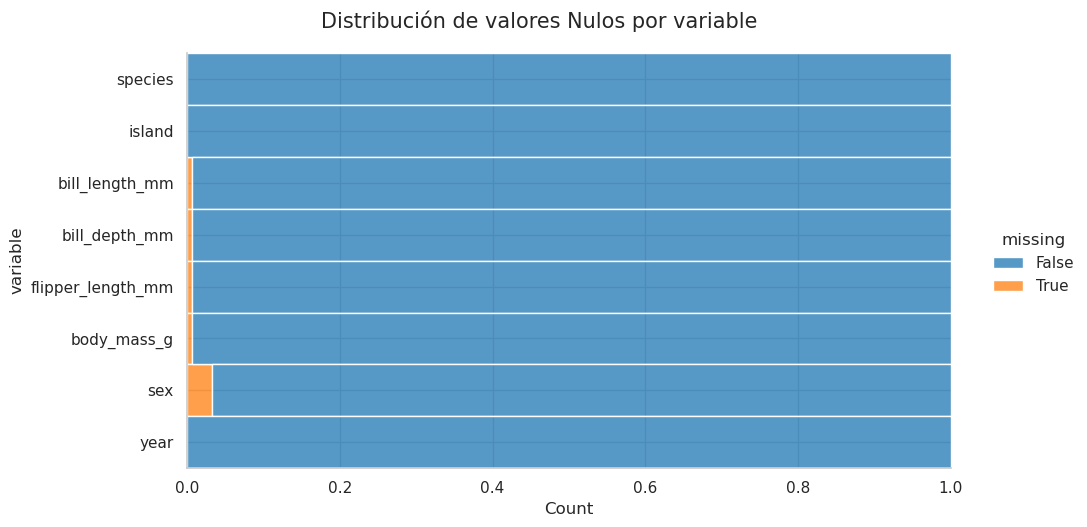

In [101]:
g = (pre_df
 .isnull()
 .melt(value_name='missing')
 .pipe(lambda pre_df:(sns.displot(data=pre_df,
                                  y='variable',
                                  hue='missing',
                                  multiple='fill',
                                  aspect=2)))
 )
g.figure.suptitle("Distribución de valores Nulos por variable", fontsize=15, y=1.05)
plt.show()

### ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [103]:
df_prueba = pre_df.dropna()
df_prueba.shape

(333, 8)

### Guardamos los datos procesados

In [104]:
df = pre_df.dropna()
df.to_csv('../../../data/processed/datos_procesados_penguins.csv', index=False)